## RNN con California Housing

## Librerías

In [37]:
# Tratamiento de datos
import numpy as np
import pandas as pd
# Visualizaciones
import matplotlib.pyplot as plt 
import seaborn as sns
#Modelo de aprendizaje
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, root_mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.datasets import fetch_california_housing
# Redes Neuronales 
import tensorflow as tf
from tensorflow import keras
from keras import  layers 


Descargar los datos 

In [8]:
housing= fetch_california_housing()
#X= housing.data 
#y = housing.target 
#features_names= housing.features_names
#df= pd.DataFrame(feature_names=features_names)

## Crear un Dataframe

In [14]:
X= housing.data 
y = housing.target 

features_names= housing.feature_names

In [19]:
df= pd.DataFrame(X, columns=features_names)
df['Price']= y 

## Primera exploración

In [16]:
print(f"tamaño del dataset {df.shape}")
print(f"\n Información de las columnas")
print(df.info())
print("\ estadisticas descriptivas")
print(df.describe())

tamaño del dataset (20640, 9)

 Información de las columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
\ estadisticas descriptivas
             MedInc      HouseAge  ...     Longitude        target
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...  

In [18]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Text(0, 0.5, ' Frecuencia')

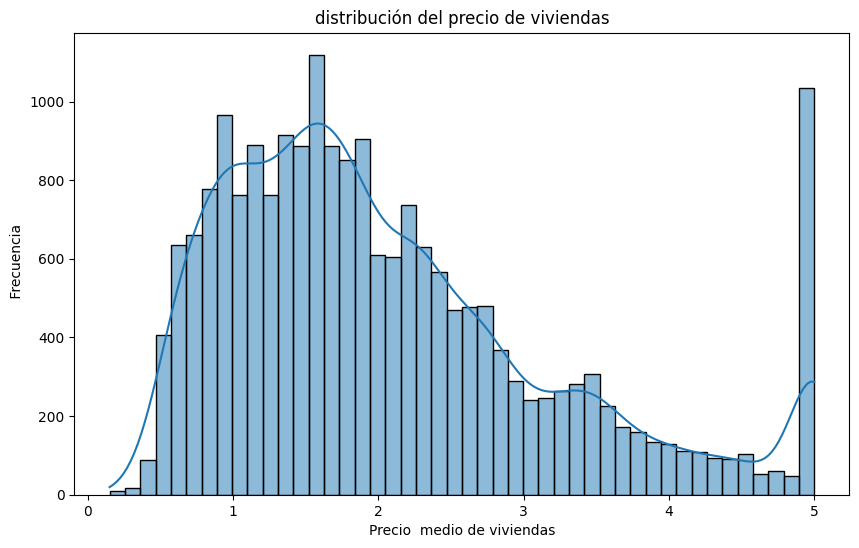

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'],kde=True)
plt.title('distribución del precio de viviendas')
plt.xlabel('Precio  medio de viviendas')
plt.ylabel(' Frecuencia')

Text(0.5, 1.0, 'Matriz de correlación')

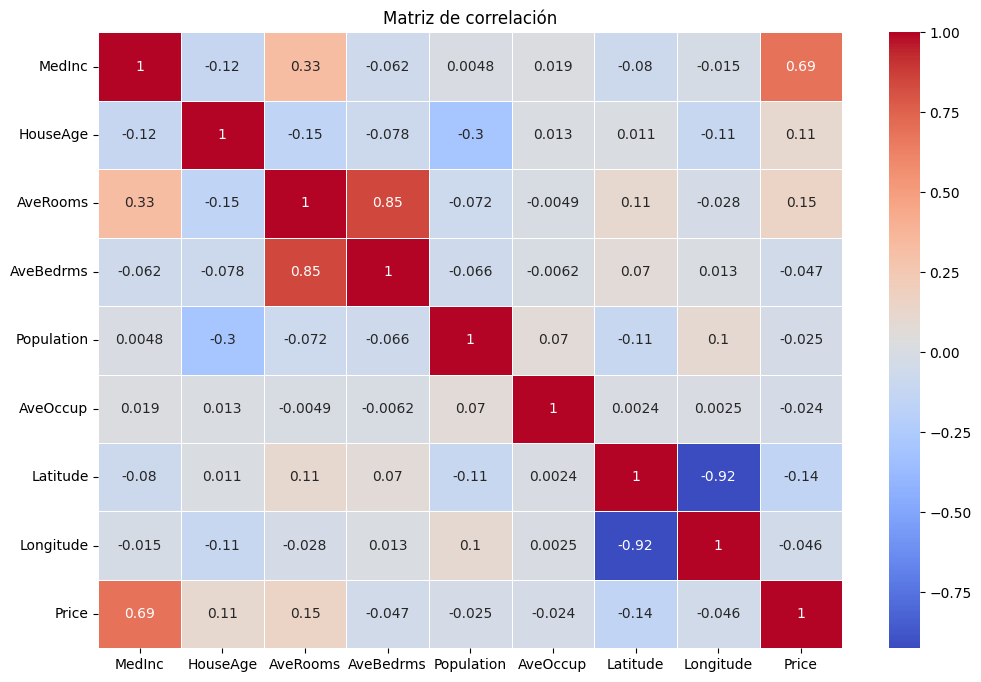

In [23]:
plt.figure(figsize=(12,8))
correlacion_matrix= df.corr()
sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')


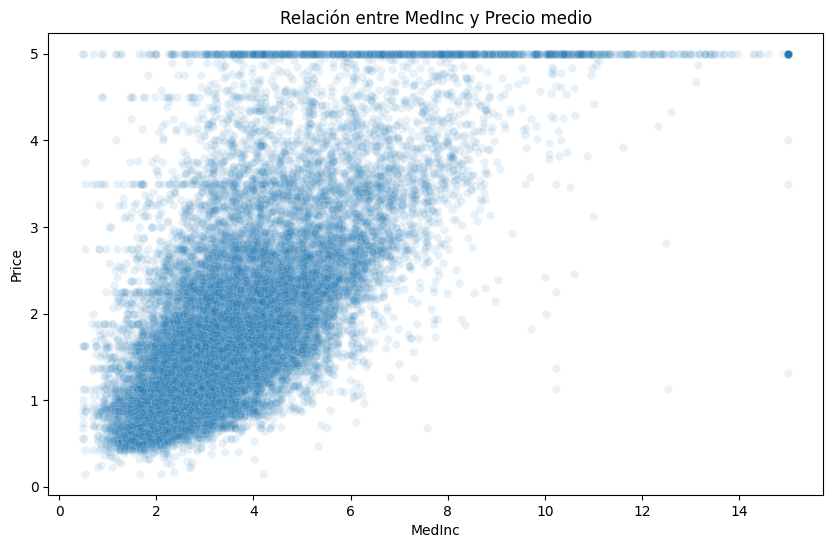

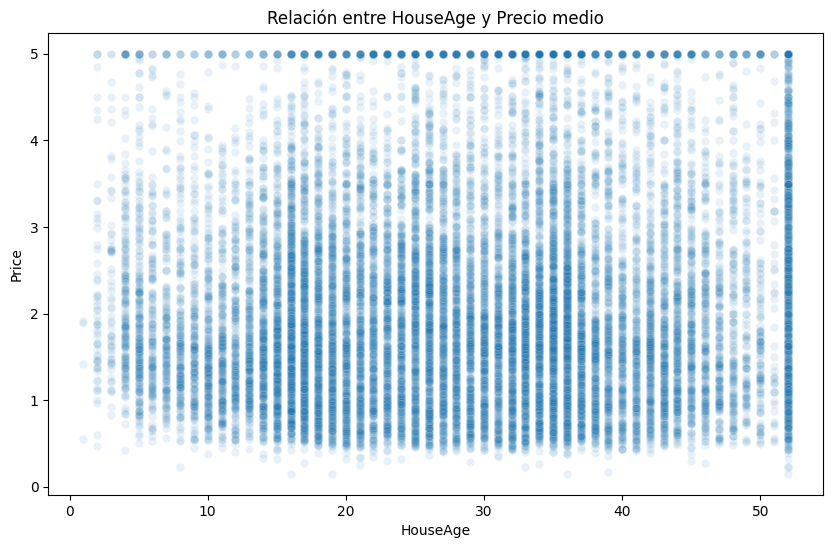

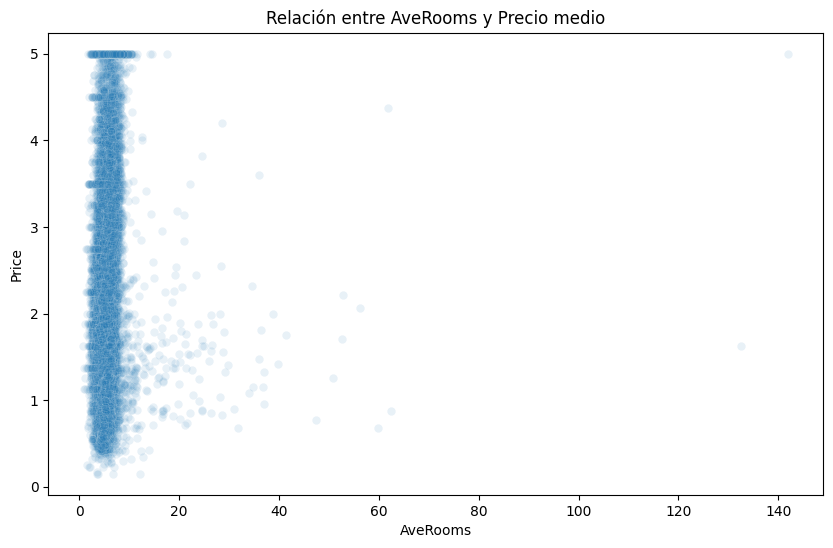

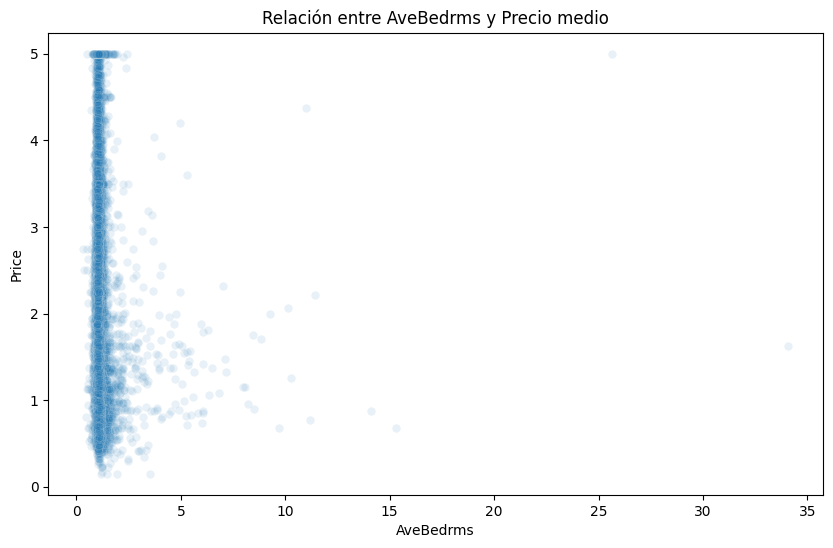

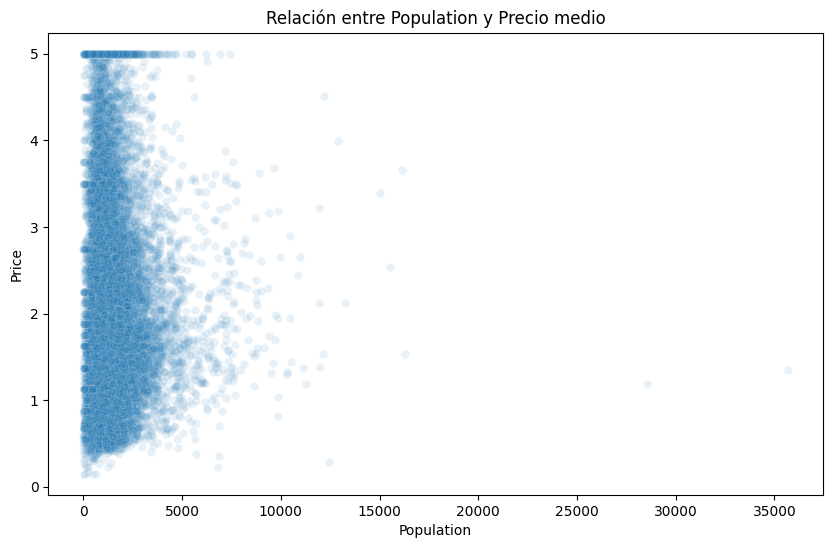

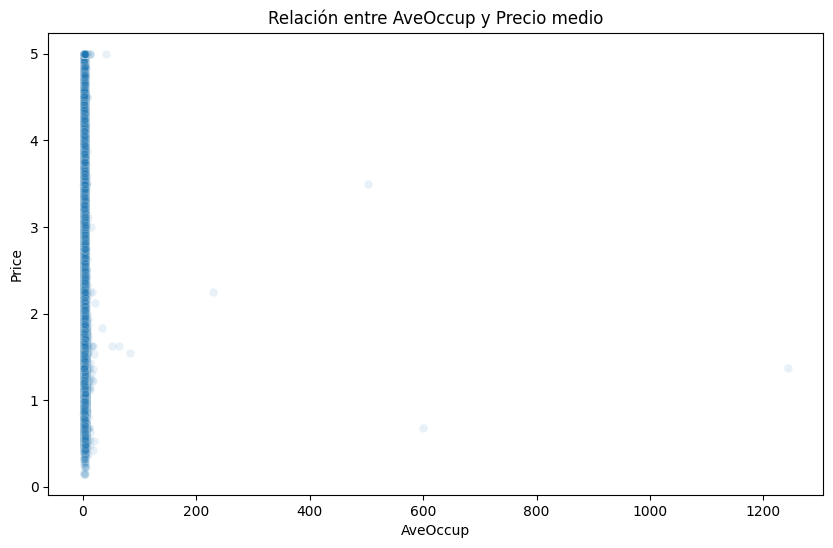

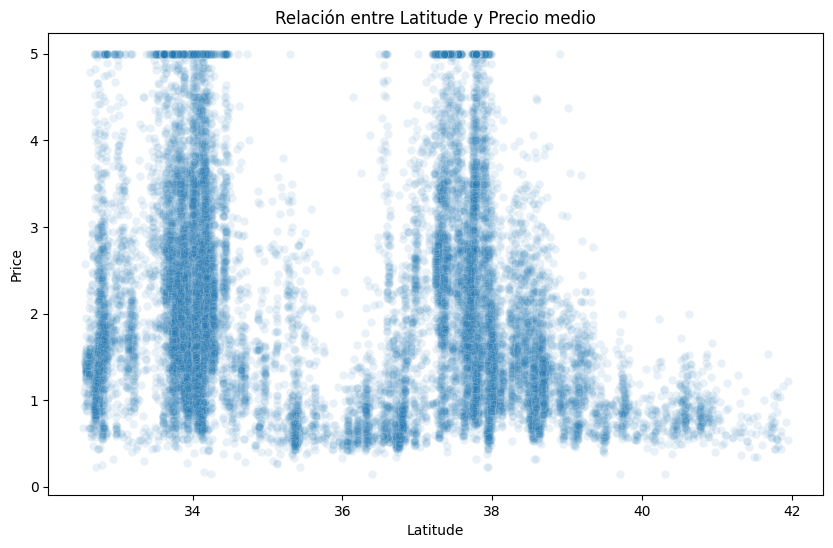

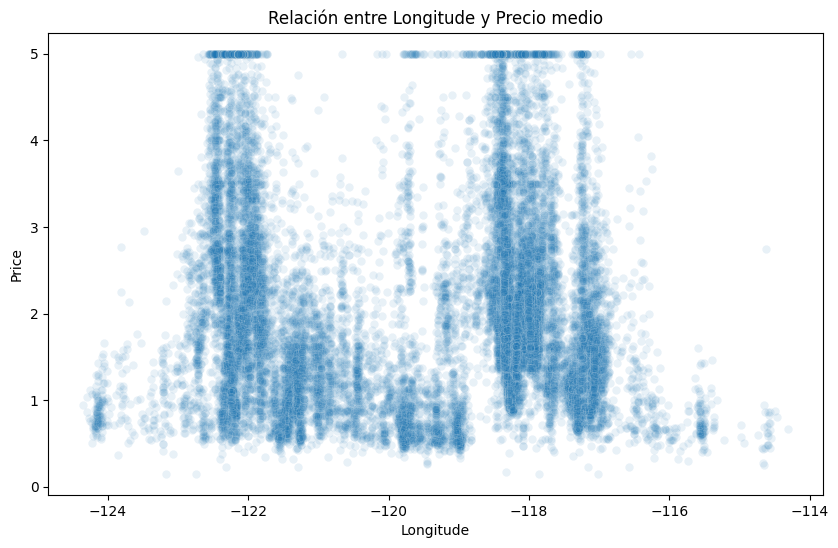

In [24]:
## Visualizaciones de relaciones entre características y Price
for feature in features_names:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df[feature], y=df['Price'], alpha=0.1)
    plt.title(f'Relación entre {feature} y Precio medio')
    plt.show;

## Preprocesado de datos

hay que dividir antes de procesar los datos porque los test no deben estar escalados

In [27]:
# Dividir en Train y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)
# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # solo se entrena una vez
X_test_scaled = scaler.transform(X_test)

## Construir el modelo RNN

In [30]:
def   build_model(input_shape, learning_rate=0.001):
    model = keras.models.Sequential(
        [ 
           
            layers.Dense(128, activation='relu', input_shape=(input_shape,)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(32, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(16, activation='relu'),
            layers.Dense(1)

        ]
    )
    optimizador= keras.optimizers.Adam(learning_rate= learning_rate)
    model.compile(optimizer=optimizador, loss='mse', metrics=['mae'])
    return model

In [32]:
model= build_model(input_shape=X_train_scaled.shape[1] )
model.summary()
                   

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,481 (48.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [33]:
# Callback de entrenamiento
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=30, #cuanto
                                               min_delta=0.01, # mas pequeño mas permisivo 
                                               restore_best_weights=True) #
reduce_lr= keras.callbacks.ReduceLROnPlateau(
    factor=0.2,
    patience=10, 
    min_lr=0.00001,
    monitor='val_loss'
)


In [34]:
# Entrenar el modelo 
history= model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs= 300,
    batch_size= 32,
    callbacks=[early_stopping, reduce_lr],
    
)

Epoch 1/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 2.6095 - mae: 1.2226 - val_loss: 0.6597 - val_mae: 0.5629 - learning_rate: 0.0010
Epoch 2/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7192 - mae: 0.6254 - val_loss: 0.4878 - val_mae: 0.4969 - learning_rate: 0.0010
Epoch 3/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5963 - mae: 0.5657 - val_loss: 0.4428 - val_mae: 0.4638 - learning_rate: 0.0010
Epoch 4/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5307 - mae: 0.5310 - val_loss: 0.4370 - val_mae: 0.4468 - learning_rate: 0.0010
Epoch 5/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4926 - mae: 0.5083 - val_loss: 0.5002 - val_mae: 0.4377 - learning_rate: 0.0010
Epoch 6/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4843 - mae: 0.4994 - val_loss: 0.4020 - val_mae: 0.4390 - learning_rate: 0.0010
Epoch 7/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4393 - mae: 0.4779 - val_loss: 0.4193 - val_mae: 0.4381 - learning_rate: 0.0010

In [40]:
test_mse, test_mae= model.evaluate(X_test_scaled, y_test,verbose=0)
y_pred= model.predict(X_test_scaled)
mse= mean_squared_error(y_test,y_pred)
rmse= root_mean_squared_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

print(f'Test MSE: {mse:.4f}')
print(f'Test RMSE: {rmse*100_000:.4f}')
print(f'Test mape: {mape:.4f}')
print(f'Test MAE: {mae:.4f}')
print(f'Test R2: {r2:.4f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE: 0.3068
Test RMSE: 55389.9565
Test mape: 0.2244
Test MAE: 0.3902
Test R2: 0.7737


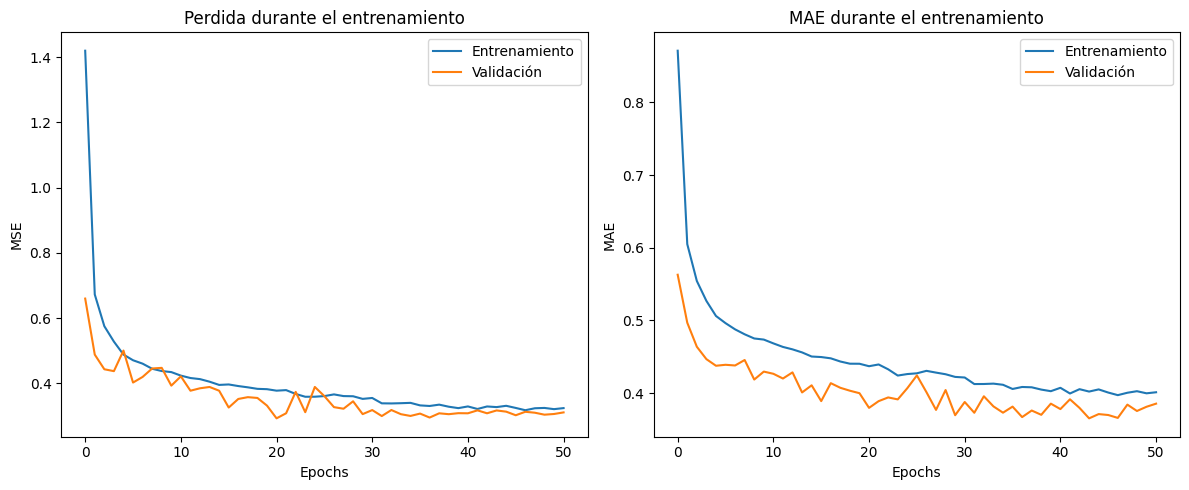

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Perdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend();


plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend();

plt.tight_layout()
plt.show;

cuando cada uno tiende a una cosa es cuando muestra overfitting.
cuanto mas cerca esta de 0 menos error que hay, por lo que entrenamineto bajara y la validación subirá.

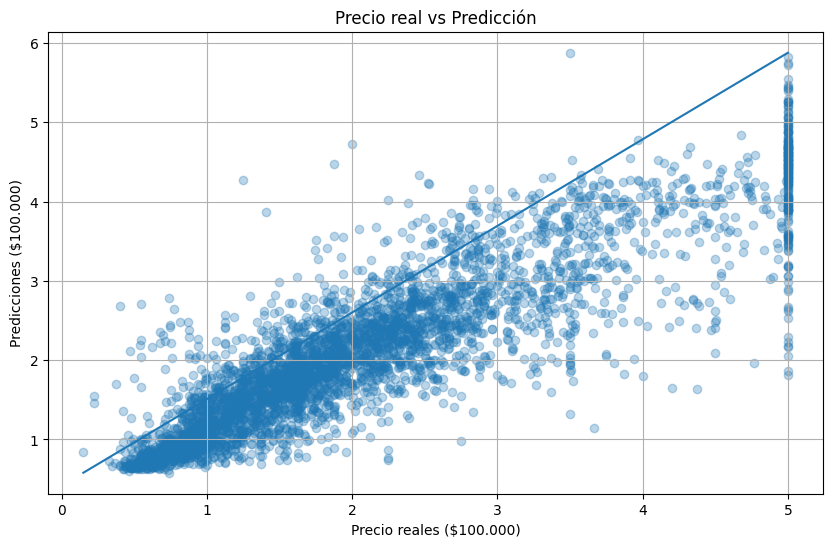

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()])
plt.xlabel('Precio reales ($100.000)' )
plt.ylabel('Predicciones ($100.000)')
plt.title('Precio real vs Predicción')
plt.grid(True)
plt.show();

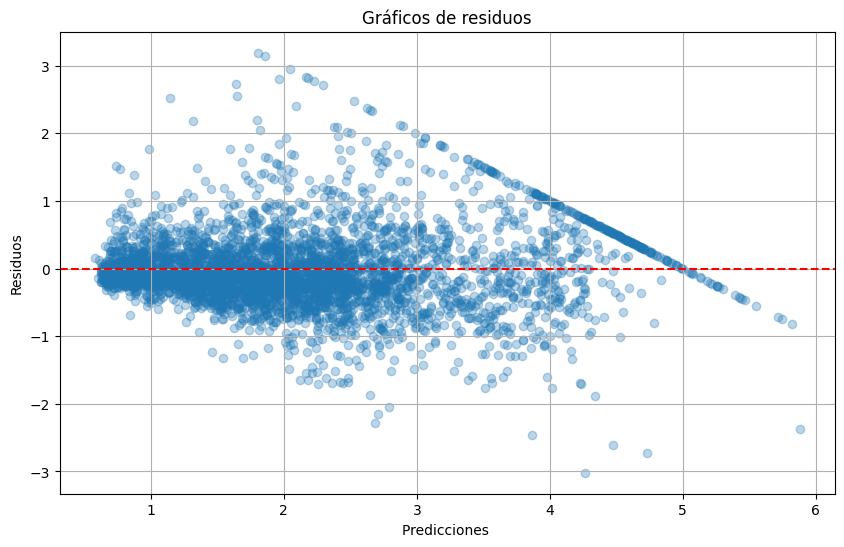

In [47]:
residuos= y_test-y_pred.flatten()
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuos,alpha=0.3)
plt.axhline(y=0, color='red',linestyle='--')
plt.xlabel('Predicciones ')
plt.ylabel('Residuos')
plt.title('Gráficos de residuos')
plt.grid(True)
plt.show();


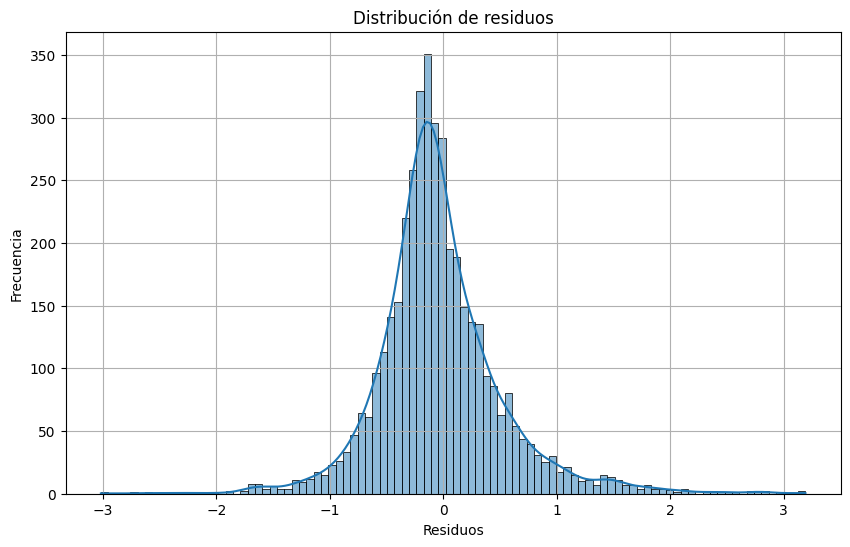

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(residuos,kde=True)
plt.title('Distribución de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show();
           

Los residuos tienen una distribución de normal por lo que vamos por bien camino 